# MIDTERM : Analytics Technology


---

In this assignment you are going to have several tasks:

1.	Import several CSV files:
  -	Physicians
  -	Scripts (files 1 – 10)
  -	Zip Codes

2.	Create provider summary and org summary tables

3.	There are 10 analysis questions each requiring a TABLE and at least 1 CHART (Barplot) To get the results you’ll likely need to break things up into steps and perform various steps including:
  -	Query to filter data
  -	Merge  to join data
  -	N-largest / N-smallest (top N, Bottom N)
  -	Concat to append datasets together
  -	agg (sum, count, mean, min, max)
  -	create barplots using seaborn
  -	Rename columns using df.column = [“col1”,”col2”,…]

4.	Devise 5 of your own analysis questions answered with tables and visualizations

6. Executive Summary


In [ ]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

## Import Data


---

You are provided several files you'll need to import the files and append (concat) them into a single table after you import.

```python
example = pd.concat(["phys1","phys2","phys3"],axis=0)
example.head()
```

**Providers:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv

**Prescriptions:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_3.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_4.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_5.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_6.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_7.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_8.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_9.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_10.csv

**Zips:**
"https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv"

NOTE: zips is delimited by `;`
```python

zips = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv",sep=";")
zips.head()
```

My advice is to clean up the column names using:
```python
zips.columns = ( zips.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(zips.columns)
zips.head()
```

In [ ]:
# import physician data
phys_1 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv')
phys_2 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv')
phys_3 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv')

In [ ]:
#putting all the physician data together
#Was append phys
concat_phys = pd.concat([phys_1,phys_2,phys_3],axis=0)
concat_phys

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,0.27,0.28,0.46,0.62,0.22,0.09,0.38,0.06,NaN,1.34
1,1003000936,Stellingworth,Mark,A,MD,M,I,701 Medical Park Dr Ste 301,NaN,Hartsville,...,0.25,0.45,0.75,0.75,0.64,0.07,0.53,0.04,0.13,1.89
2,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,0.18,0.18,0.52,0.55,0.25,NaN,0.36,0.00,NaN,0.82
3,1003002841,Choudhary,Saher,K,M.D.,F,I,109 Physicians Dr Ste C,NaN,Greer,...,0.41,0.42,0.75,0.75,0.49,0.12,0.42,NaN,0.74,1.86
4,1003006172,Quezada,Nestor,NaN,MD,M,I,4539 Hedgemore Dr,Ste 100,Charlotte,...,0.43,0.57,0.71,0.75,0.47,0.11,0.52,0.06,0.14,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,1992990717,Major,Rebecca,NaN,OD,F,I,8811 Blakeney Professional Dr,Suite 100,Charlotte,...,NaN,0.23,0.65,0.59,0.21,NaN,0.39,0.00,NaN,0.77
28007,1992992317,Ammann,Connie,B,OTR/L,F,I,4557 Technology Dr,Suite 1,Wilmington,...,0.26,0.42,0.69,0.75,0.36,0.10,0.62,NaN,NaN,1.61
28008,1992993760,Chakraborty,Kanishka,NaN,M.D,M,I,1 Professional Park Dr,Suite 21,Johnson City,...,0.31,0.39,0.63,0.75,0.53,0.12,0.45,NaN,0.09,2.49
28009,1992996292,Giles,Wesley,H,MD,M,I,979 E 3rd St Ste 300,NaN,Chattanooga,...,0.28,0.36,0.65,0.75,0.41,0.11,0.51,NaN,0.06,1.72


In [ ]:
# import prescription data
pres_1 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_1.csv')
pres_2 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_2.csv')
pres_3 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_3.csv')
pres_4 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_4.csv')
pres_5 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_5.csv')
pres_6 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_6.csv')
pres_7 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_7.csv')
pres_8 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_8.csv')
pres_9 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_9.csv')
pres_10 = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_10.csv')

In [ ]:
#Putting all the Prescription data together
#Was append_pres
concat_pres = pd.concat([pres_1,pres_2,pres_3,pres_4,pres_5,pres_6,pres_7,pres_8,pres_9,pres_10],axis=0)
concat_pres

,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate
0,0.00,1003000720,Albuterol Sulfate Hfa,Albuterol Sulfate,14,14.00,337,657.01,14.00,No
1,1.00,1003000720,Amoxicillin-Clavulanate Potass,Amoxicillin/Potassium Clav,34,34.00,328,412.06,34.00,No
2,2.00,1003000720,Azithromycin,Azithromycin,12,12.00,52,87.21,12.00,No
3,3.00,1003000720,Cephalexin,Cephalexin,25,25.00,211,144.27,25.00,No
4,4.00,1003000720,Clindamycin Hcl,Clindamycin Hcl,11,11.00,87,111.93,11.00,No
...,...,...,...,...,...,...,...,...,...,...
197559,197981.00,1992993760,Trazodone Hcl,Trazodone Hcl,15,19.00,570,90.73,NaN,No
197560,197982.00,1992993760,Valacyclovir,Valacyclovir Hcl,24,34.00,1020,1811.73,NaN,No
197561,197983.00,1992993760,Xarelto,Rivaroxaban,19,19.00,570,8936.06,NaN,No
197562,197984.00,1992996292,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,36,36.00,83,127.46,35.00,Yes


It's okay that there are 10 columns

In [ ]:
# import steps
zips = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv",sep=";")
zips.head()

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,90005,Los Angeles,CA,California,True,NaN,39732.00,14151.80,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.05912, -118.30654"
1,90006,Los Angeles,CA,California,True,NaN,59576.00,11981.70,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.04801, -118.29418"
2,90008,Los Angeles,CA,California,True,NaN,31754.00,3337.90,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.00956, -118.34706"
3,90040,Los Angeles,CA,California,True,NaN,12328.00,852.80,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.99353, -118.14907"
4,90045,Los Angeles,CA,California,True,NaN,40567.00,1459.60,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.95297, -118.40014"


In [ ]:
#Clean Physician Columns
concat_phys.columns = (concat_phys.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', ''))
print(concat_phys.columns)


Index(['rndrng_npi', 'rndrng_prvdr_last_org_name', 'rndrng_prvdr_first_name',
       'rndrng_prvdr_mi', 'rndrng_prvdr_crdntls', 'rndrng_prvdr_gndr',
       'rndrng_prvdr_ent_cd', 'rndrng_prvdr_st1', 'rndrng_prvdr_st2',
       'rndrng_prvdr_city', 'rndrng_prvdr_state_abrvtn',
       'rndrng_prvdr_state_fips', 'rndrng_prvdr_zip5', 'rndrng_prvdr_ruca',
       'rndrng_prvdr_ruca_desc', 'rndrng_prvdr_cntry', 'rndrng_prvdr_type',
       'rndrng_prvdr_mdcr_prtcptg_ind', 'tot_hcpcs_cds', 'tot_benes',
       'tot_srvcs', 'tot_sbmtd_chrg', 'tot_mdcr_alowd_amt',
       'tot_mdcr_pymt_amt', 'tot_mdcr_stdzd_amt', 'drug_sprsn_ind',
       'drug_tot_hcpcs_cds', 'drug_tot_benes', 'drug_tot_srvcs',
       'drug_sbmtd_chrg', 'drug_mdcr_alowd_amt', 'drug_mdcr_pymt_amt',
       'drug_mdcr_stdzd_amt', 'med_sprsn_ind', 'med_tot_hcpcs_cds',
       'med_tot_benes', 'med_tot_srvcs', 'med_sbmtd_chrg',
       'med_mdcr_alowd_amt', 'med_mdcr_pymt_amt', 'med_mdcr_stdzd_amt',
       'bene_avg_age', 'bene_age_lt_65_

In [ ]:
#Clean Prescription Columns
concat_pres.columns = (concat_pres.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', ''))
print(concat_pres.columns)


Index(['...1', 'prscrbr_npi', 'brnd_name', 'gnrc_name', 'tot_clms',
       'tot_30day_fills', 'tot_day_suply', 'tot_drug_cst', 'tot_benes',
       'is_opiate'],
      dtype='object')


In [ ]:
#Clean Zips Columns
zips.columns = ( zips.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(zips.columns)
zips.head()

Index(['zip_code', 'official_usps_city_name', 'official_usps_state_code',
       'official_state_name', 'zcta', 'zcta_parent', 'population', 'density',
       'primary_official_county_code', 'primary_official_county_name',
       'county_weights', 'official_county_name', 'official_county_code',
       'imprecise', 'military', 'timezone', 'geo_point'],
      dtype='object')


,zip_code,official_usps_city_name,official_usps_state_code,official_state_name,zcta,zcta_parent,population,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,90005,Los Angeles,CA,California,True,NaN,39732.00,14151.80,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.05912, -118.30654"
1,90006,Los Angeles,CA,California,True,NaN,59576.00,11981.70,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.04801, -118.29418"
2,90008,Los Angeles,CA,California,True,NaN,31754.00,3337.90,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.00956, -118.34706"
3,90040,Los Angeles,CA,California,True,NaN,12328.00,852.80,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.99353, -118.14907"
4,90045,Los Angeles,CA,California,True,NaN,40567.00,1459.60,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.95297, -118.40014"


## TASK 2 – STRUCTURE



---

### TASK 2A - Create Provider Summary

### TASK 2b - Create Org Summary


Provider Summary and physician summary are used interchangably

#Provider/Physician Summary

In [ ]:
# phys_summary_append = append_phys... was the original, changed to phys_append and concat_phys
#now changed to phys_filter
phys_filter= concat_phys[concat_phys['rndrng_prvdr_ent_cd']=='I']
phys_filter

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,bene_cc_dprssn_pct,bene_cc_dbts_pct,bene_cc_hyplpdma_pct,bene_cc_hyprtnsn_pct,bene_cc_ihd_pct,bene_cc_opo_pct,bene_cc_raoa_pct,bene_cc_sz_pct,bene_cc_strok_pct,bene_avg_risk_scre
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,0.27,0.28,0.46,0.62,0.22,0.09,0.38,0.06,NaN,1.34
1,1003000936,Stellingworth,Mark,A,MD,M,I,701 Medical Park Dr Ste 301,NaN,Hartsville,...,0.25,0.45,0.75,0.75,0.64,0.07,0.53,0.04,0.13,1.89
3,1003002841,Choudhary,Saher,K,M.D.,F,I,109 Physicians Dr Ste C,NaN,Greer,...,0.41,0.42,0.75,0.75,0.49,0.12,0.42,NaN,0.74,1.86
4,1003006172,Quezada,Nestor,NaN,MD,M,I,4539 Hedgemore Dr,Ste 100,Charlotte,...,0.43,0.57,0.71,0.75,0.47,0.11,0.52,0.06,0.14,3.23
5,1003006503,Jegede,Olugbemiga,E,M.D,M,I,201 E Wendover Ave,NaN,Greensboro,...,0.60,NaN,NaN,0.37,NaN,0.00,NaN,0.00,NaN,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,1992990717,Major,Rebecca,NaN,OD,F,I,8811 Blakeney Professional Dr,Suite 100,Charlotte,...,NaN,0.23,0.65,0.59,0.21,NaN,0.39,0.00,NaN,0.77
28007,1992992317,Ammann,Connie,B,OTR/L,F,I,4557 Technology Dr,Suite 1,Wilmington,...,0.26,0.42,0.69,0.75,0.36,0.10,0.62,NaN,NaN,1.61
28008,1992993760,Chakraborty,Kanishka,NaN,M.D,M,I,1 Professional Park Dr,Suite 21,Johnson City,...,0.31,0.39,0.63,0.75,0.53,0.12,0.45,NaN,0.09,2.49
28009,1992996292,Giles,Wesley,H,MD,M,I,979 E 3rd St Ste 300,NaN,Chattanooga,...,0.28,0.36,0.65,0.75,0.41,0.11,0.51,NaN,0.06,1.72


In [ ]:
#Inner Join
#phys_summary was phys_join_zip
phys_summary = pd.merge(phys_filter,zips, left_on='rndrng_prvdr_zip5', right_on='zip_code',how='inner')
phys_summary

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,260.80,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
1,1013204148,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,260.80,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
2,1013949759,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,260.80,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
3,1013998848,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,260.80,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
4,1063481497,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,260.80,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,1982041182,Moreland,Natalie,J,"M.S., CCC-SLP",F,I,55 Nursing Home Rd,NaN,Chuckey,...,39.50,47059,Greene,"{""47059"": ""78.76"", ""47179"": ""21.24""}","Greene,Washington","47059,47179",False,False,America/New_York,"36.19901, -82.66422"
72654,1992072524,Graham,Patton,D,NP-C,M,I,6419 Arno College Grove Rd,NaN,College Grove,...,31.40,47187,Williamson,"{""47187"": ""96.4"", ""47149"": ""1.96"", ""47117"": ""1...","Williamson,Rutherford,Marshall","47187,47149,47117",False,False,America/Chicago,"35.77988, -86.71733"
72655,1992785653,Nieto,Charles,M,M.D.,M,I,4789 State Rd,NaN,Ridgeville,...,21.00,45035,Dorchester,"{""45035"": ""68.86"", ""45015"": ""24.71"", ""45029"": ...","Dorchester,Berkeley,Colleton","45035,45015,45029",False,False,America/New_York,"33.05707, -80.31845"
72656,1992804587,Warren,Joseph,R,PA,M,I,109 S Sycamore St,NaN,Fremont,...,29.00,37191,Wayne,"{""37191"": ""93.96"", ""37195"": ""6.04""}","Wayne,Wilson","37191,37195",False,False,America/New_York,"35.55528, -77.95795"


In [ ]:
#New Phys Summary
phys_summary['provider_name'] = phys_summary["rndrng_npi"].astype(str) + ": " + phys_summary["rndrng_prvdr_first_name"] + " " + phys_summary["rndrng_prvdr_last_org_name"]
phys_summary

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point,provider_name
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1003000720: Otniel Hernandez
1,1013204148,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013204148: Carrie Merritt
2,1013949759,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013949759: G. Choiniere
3,1013998848,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013998848: Michael Riccoboni
4,1063481497,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1063481497: Rose Doyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,1982041182,Moreland,Natalie,J,"M.S., CCC-SLP",F,I,55 Nursing Home Rd,NaN,Chuckey,...,47059,Greene,"{""47059"": ""78.76"", ""47179"": ""21.24""}","Greene,Washington","47059,47179",False,False,America/New_York,"36.19901, -82.66422",1982041182: Natalie Moreland
72654,1992072524,Graham,Patton,D,NP-C,M,I,6419 Arno College Grove Rd,NaN,College Grove,...,47187,Williamson,"{""47187"": ""96.4"", ""47149"": ""1.96"", ""47117"": ""1...","Williamson,Rutherford,Marshall","47187,47149,47117",False,False,America/Chicago,"35.77988, -86.71733",1992072524: Patton Graham
72655,1992785653,Nieto,Charles,M,M.D.,M,I,4789 State Rd,NaN,Ridgeville,...,45035,Dorchester,"{""45035"": ""68.86"", ""45015"": ""24.71"", ""45029"": ...","Dorchester,Berkeley,Colleton","45035,45015,45029",False,False,America/New_York,"33.05707, -80.31845",1992785653: Charles Nieto
72656,1992804587,Warren,Joseph,R,PA,M,I,109 S Sycamore St,NaN,Fremont,...,37191,Wayne,"{""37191"": ""93.96"", ""37195"": ""6.04""}","Wayne,Wilson","37191,37195",False,False,America/New_York,"35.55528, -77.95795",1992804587: Joseph Warren


#Organization Summary

In [ ]:
#Org Filter
org_filter= concat_phys[concat_phys['rndrng_prvdr_ent_cd']=='O']
org_filter

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,bene_cc_dprssn_pct,bene_cc_dbts_pct,bene_cc_hyplpdma_pct,bene_cc_hyprtnsn_pct,bene_cc_ihd_pct,bene_cc_opo_pct,bene_cc_raoa_pct,bene_cc_sz_pct,bene_cc_strok_pct,bene_avg_risk_scre
2,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,0.18,0.18,0.52,0.55,0.25,NaN,0.36,0.00,NaN,0.82
47,1003051129,Fcrx Sc Inc,NaN,NaN,NaN,NaN,O,2760 Celanese Rd,NaN,Rock Hill,...,NaN,NaN,0.52,0.74,NaN,NaN,0.45,0.00,0.00,0.79
64,1003069832,Beulaville Pharmacy Inc,NaN,NaN,NaN,NaN,O,103 Crossover Rd,NaN,Beulaville,...,NaN,0.31,0.53,0.68,0.35,NaN,0.42,NaN,NaN,0.89
94,1003096322,Publix Tennessee Llc,NaN,NaN,NaN,NaN,O,8644 E Brainerd Rd,NaN,Chattanooga,...,0.15,0.24,0.50,0.62,0.24,0.06,0.39,NaN,NaN,0.86
110,1003110677,Charlotte Radiology Pa,NaN,NaN,NaN,NaN,O,1025 Morehead Medical Dr Ste 150,NaN,Charlotte,...,0.26,0.21,0.44,0.51,0.17,0.06,0.32,NaN,NaN,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27914,1992904551,Walgreen Co.,NaN,NaN,NaN,NaN,O,19600 Alberta St,NaN,Oneida,...,0.18,0.32,0.70,0.67,0.32,0.08,0.34,NaN,NaN,0.95
27953,1992944631,Apothecary Consultants Llc,NaN,NaN,NaN,NaN,O,110 Main St,NaN,Savannah,...,0.13,0.24,0.50,0.59,0.33,0.06,0.36,NaN,NaN,0.91
27963,1992954598,Publix Tennessee Llc,NaN,NaN,NaN,NaN,O,1640 Lee Victory Pkwy,NaN,Smyrna,...,0.20,0.27,0.55,0.63,0.25,0.07,0.32,NaN,NaN,0.81
27974,1992965263,"South Carolina Cvs Pharmacy, L.L.C.",NaN,NaN,NaN,NaN,O,1002 Sams Crossing Road,NaN,Columbia,...,0.13,0.29,0.58,0.64,0.26,0.05,0.38,NaN,NaN,0.77


In [ ]:
#Inner Join
org_summary = pd.merge(org_filter,zips, left_on='rndrng_prvdr_zip5', right_on='zip_code',how='inner')
org_summary

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,230.60,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
1,1033624853,East Tennessee Healthcare Holdings Inc,NaN,NaN,NaN,NaN,O,203 Gray Commons Cir Ste 110,NaN,Gray,...,230.60,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
2,1073940334,"Boones Creek Pharmacy, Inc.",NaN,NaN,NaN,NaN,O,4729 N Roan St,Ste 2,Johnson City,...,230.60,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
3,1194812446,Tritenn Llc,NaN,NaN,NaN,NaN,O,208 Suncrest St,Ste 1,Gray,...,230.60,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
4,1366469843,K Va T Food Stores Inc,NaN,NaN,NaN,NaN,O,125 Judge Gresham Rd,NaN,Gray,...,230.60,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,1982707691,"Tennessee Cvs Pharmacy, L.L.C.",NaN,NaN,NaN,NaN,O,340 West Main Street,NaN,Monteagle,...,40.00,47061,Grundy,"{""47061"": ""63.23"", ""47115"": ""36.77""}","Grundy,Marion","47061,47115",False,False,America/Chicago,"35.22901, -85.82423"
4275,1982773909,Todd's Discount Drugs Inc.,NaN,NaN,NaN,NaN,O,347 E Main St,NaN,Adamsville,...,21.30,47109,McNairy,"{""47109"": ""66.72"", ""47071"": ""33.28""}","McNairy,Hardin","47109,47071",False,False,America/Chicago,"35.25849, -88.39883"
4276,1992141717,Shoreline Imaging,NaN,NaN,NaN,NaN,O,910 Gypsy Ln,NaN,Mc Clellanville,...,6.90,45019,Charleston,"{""45019"": ""100""}",Charleston,45019,False,False,America/New_York,"33.09891, -79.45896"
4277,1992808679,North Carolina Cvs Pharmacy Llc,NaN,NaN,NaN,NaN,O,1022 Albemarle Rd,NaN,Troy,...,20.10,37123,Montgomery,"{""37123"": ""97.43"", ""37151"": ""2.57""}","Montgomery,Randolph","37123,37151",False,False,America/New_York,"35.42018, -79.95884"


In [ ]:
# org_summary.drop(columns='provider_name', inplace=True)
# org_summary = org_summary.drop(columns='provider_name')

In [ ]:
#Create new column
org_summary['org_name'] = org_summary["rndrng_npi"].astype(str) + ": " +  org_summary["rndrng_prvdr_last_org_name"] + " - " + org_summary["official_usps_state_code"]
org_summary

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point,org_name
0,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1003002254: Walgreen Co. - TN
1,1033624853,East Tennessee Healthcare Holdings Inc,NaN,NaN,NaN,NaN,O,203 Gray Commons Cir Ste 110,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1033624853: East Tennessee Healthcare Holdings...
2,1073940334,"Boones Creek Pharmacy, Inc.",NaN,NaN,NaN,NaN,O,4729 N Roan St,Ste 2,Johnson City,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219","1073940334: Boones Creek Pharmacy, Inc. - TN"
3,1194812446,Tritenn Llc,NaN,NaN,NaN,NaN,O,208 Suncrest St,Ste 1,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1194812446: Tritenn Llc - TN
4,1366469843,K Va T Food Stores Inc,NaN,NaN,NaN,NaN,O,125 Judge Gresham Rd,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1366469843: K Va T Food Stores Inc - TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,1982707691,"Tennessee Cvs Pharmacy, L.L.C.",NaN,NaN,NaN,NaN,O,340 West Main Street,NaN,Monteagle,...,47061,Grundy,"{""47061"": ""63.23"", ""47115"": ""36.77""}","Grundy,Marion","47061,47115",False,False,America/Chicago,"35.22901, -85.82423","1982707691: Tennessee Cvs Pharmacy, L.L.C. - TN"
4275,1982773909,Todd's Discount Drugs Inc.,NaN,NaN,NaN,NaN,O,347 E Main St,NaN,Adamsville,...,47109,McNairy,"{""47109"": ""66.72"", ""47071"": ""33.28""}","McNairy,Hardin","47109,47071",False,False,America/Chicago,"35.25849, -88.39883",1982773909: Todd's Discount Drugs Inc. - TN
4276,1992141717,Shoreline Imaging,NaN,NaN,NaN,NaN,O,910 Gypsy Ln,NaN,Mc Clellanville,...,45019,Charleston,"{""45019"": ""100""}",Charleston,45019,False,False,America/New_York,"33.09891, -79.45896",1992141717: Shoreline Imaging - SC
4277,1992808679,North Carolina Cvs Pharmacy Llc,NaN,NaN,NaN,NaN,O,1022 Albemarle Rd,NaN,Troy,...,37123,Montgomery,"{""37123"": ""97.43"", ""37151"": ""2.57""}","Montgomery,Randolph","37123,37151",False,False,America/New_York,"35.42018, -79.95884",1992808679: North Carolina Cvs Pharmacy Llc - NC


# TASK 3 - ANALYSIS



---

There are 10 analysis tasks, requiring you to build a table (RESnn) and at least one bar-chart. For each analysis add a Markdown Cell at the top denoting which analysis step this is. i've added an example for Analysis result 1


## RES01:  “TOP 10 MEDICARE PROVIDERS BY TOT_MDCR_PYMT_AMT”


---




In [ ]:
#phys_summary.columns

In [ ]:
#Task 4 of pandas_seaborn project
#grouped_pymt_amt = phys_summary.groupby('tot_mdcr_pymt_amt')
#grouped_pymt_amt['provider_name'].count()
#Res01 =
#grouped_pymt_amt = phys_summary.groupby('tot_mdcr_pymt_amt')
#grouped_pymt_amt['provider_name'].value_counts().nlargest(10)
#grouped_pymt_amt = phys_summary.groupby('provider_name')
#grouped_pymt_amt['tot_mdcr_pymt_amt'].value_counts().nlargest(10)

In [ ]:
Res01 = phys_summary.groupby('provider_name')[['tot_mdcr_pymt_amt']].sum().nlargest(10,'tot_mdcr_pymt_amt').reset_index()
Res01

,provider_name,tot_mdcr_pymt_amt
0,1851320691: Bradley Somer,14030052.64
1,1366683823: Wanda Lowery,11462667.60
2,1750541553: Shil Patel,10526851.61
3,1023018728: Ross Kerns,8945222.23
4,1801103643: Syed Sameer Nasir,8347614.58
5,1679529473: David Portnoy,8169092.45
6,1639179708: Mitchell Martin,8148045.67
7,1932209855: Robert Lavey,8060160.20
8,1982670147: John Doster,7796761.71
9,1619947876: Daniel Ibach,7643785.10


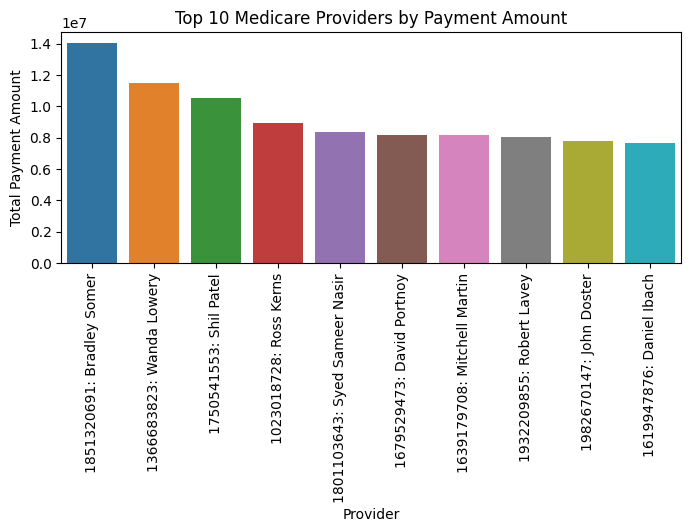

,provider_name,tot_mdcr_pymt_amt
0,1851320691: Bradley Somer,14030052.64
1,1366683823: Wanda Lowery,11462667.60
2,1750541553: Shil Patel,10526851.61
3,1023018728: Ross Kerns,8945222.23
4,1801103643: Syed Sameer Nasir,8347614.58
5,1679529473: David Portnoy,8169092.45
6,1639179708: Mitchell Martin,8148045.67
7,1932209855: Robert Lavey,8060160.20
8,1982670147: John Doster,7796761.71
9,1619947876: Daniel Ibach,7643785.10


In [ ]:
#Res01 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res01,
              x='provider_name',
              y='tot_mdcr_pymt_amt',)
plt.title('Top 10 Medicare Providers by Payment Amount')
plt.xlabel('Provider')
plt.xticks(rotation=90)
plt.ylabel('Total Payment Amount')
plt.show()
Res01

In [ ]:
#template
#customer_count= pd.DataFrame(grouped_churn_True['customer_id'].count().nlargest(50,keep='all').reset_index())
#customer_count
#Not Correct ways to create the dataframe
#prov_and_pymt_amt = pd.DataFrame(grouped_pymt_amt['tot_mdcr_pymt_amt'].value_counts().nlargest(10).reset_index())
#prov_and_pymt_amt
#prov_and_pymt_amt = pd.DataFrame(grouped_pymt_amt['provider_name'].value_counts().nlargest(10))
#prov_and_pymt_amt

## RES02: TITLE “TOP 10 MEDICARE ORGANIZATIONS BY TOT_MDCR_PYMT_AMT”


---



In [ ]:
#org_summary.columns

In [ ]:
Res02 = org_summary.groupby('org_name')[['tot_mdcr_pymt_amt']].sum().nlargest(10,'tot_mdcr_pymt_amt').reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Res02

,org_name,tot_mdcr_pymt_amt
0,1538144910: Laboratory Corporation Of America ...,234670845.50
1,"1174009245: Vikor Scientific, Llc - SC",42198509.44
2,1699782722: Aegis Sciences Corporation - TN,33066425.94
3,"1134538713: Mako Medical Laboratories, Llc - NC",31287531.70
4,"1235186800: Pathgroup Labs, Llc - TN",21797255.78
5,1548370745: Memphis Pathology Laboratory - TN,20159010.52
6,1750368700: Laboratory Corporation Of America ...,19643419.72
7,1124417357: Aegis Sciences Corporation - TN,16931095.66
8,1487212551: Quest Diagnostics Clinical Laborat...,15866817.32
9,"1508215922: Foundation Medicine, Inc. - NC",15640629.10


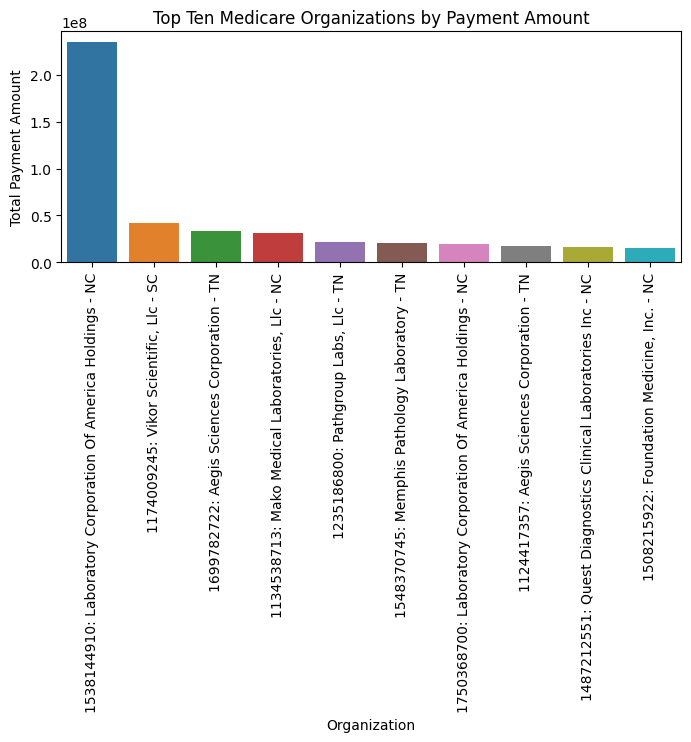

,org_name,tot_mdcr_pymt_amt
0,1538144910: Laboratory Corporation Of America ...,234670845.50
1,"1174009245: Vikor Scientific, Llc - SC",42198509.44
2,1699782722: Aegis Sciences Corporation - TN,33066425.94
3,"1134538713: Mako Medical Laboratories, Llc - NC",31287531.70
4,"1235186800: Pathgroup Labs, Llc - TN",21797255.78
5,1548370745: Memphis Pathology Laboratory - TN,20159010.52
6,1750368700: Laboratory Corporation Of America ...,19643419.72
7,1124417357: Aegis Sciences Corporation - TN,16931095.66
8,1487212551: Quest Diagnostics Clinical Laborat...,15866817.32
9,"1508215922: Foundation Medicine, Inc. - NC",15640629.10


In [ ]:
#Res02 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res02,
              x='org_name',
              y='tot_mdcr_pymt_amt',)
plt.title('Top Ten Medicare Organizations by Payment Amount')
plt.xlabel('Organization')
plt.xticks(rotation=90)
plt.ylabel('Total Payment Amount')
plt.show()
Res02

## RES03: TITLE “NURSE PRACTITIONERS BY STATE”


---



In [ ]:
#phys_summary.columns

In [ ]:
phys_np = phys_summary[phys_summary['rndrng_prvdr_type']== 'Nurse Practitioner']
phys_np['rndrng_prvdr_type']

0        Nurse Practitioner
2        Nurse Practitioner
24       Nurse Practitioner
30       Nurse Practitioner
32       Nurse Practitioner
                ...        
72624    Nurse Practitioner
72628    Nurse Practitioner
72638    Nurse Practitioner
72647    Nurse Practitioner
72654    Nurse Practitioner
Name: rndrng_prvdr_type, Length: 12863, dtype: object

In [ ]:
#similar to pandas_seaborn task 4 part 1
#Res03 = phys_np.groupby('rndrng_prvdr_state_abrvtn')[['rndrng_prvdr_type']].value_counts().nlargest().reset_index()
#Res03
#Not quite right but close way to get graph
#Res03 = phys_np.groupby('rndrng_prvdr_state_abrvtn').count().nlargest(3,'rndrng_prvdr_type').reset_index()
#Res03

In [ ]:
Res03 = phys_np.groupby('rndrng_prvdr_state_abrvtn')['rndrng_prvdr_type'].count().nlargest().reset_index()
Res03

,rndrng_prvdr_state_abrvtn,rndrng_prvdr_type
0,TN,5314
1,NC,4997
2,SC,2552


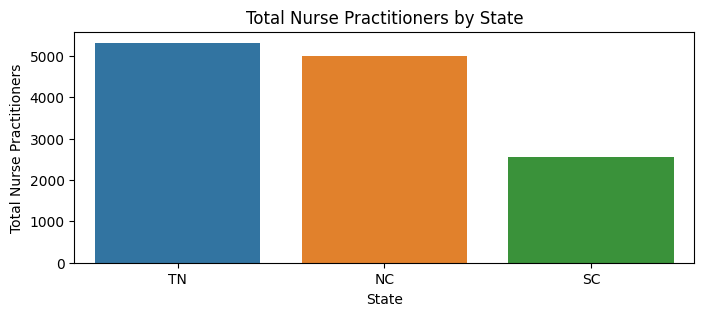

,rndrng_prvdr_state_abrvtn,rndrng_prvdr_type
0,TN,5314
1,NC,4997
2,SC,2552


In [ ]:
#Res03 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res03,
              x='rndrng_prvdr_state_abrvtn',
              y='rndrng_prvdr_type',)
plt.title('Total Nurse Practitioners by State')
plt.xlabel('State')
plt.ylabel('Total Nurse Practitioners')
plt.show()
Res03

## RES04: TITLE “ORGANIZATION TOTAL SPENDING BY STATE


---



In [ ]:
Res04 = org_summary.groupby('rndrng_prvdr_state_abrvtn')[['tot_mdcr_pymt_amt']].sum().nlargest(3,'tot_mdcr_pymt_amt').reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Res04

,rndrng_prvdr_state_abrvtn,tot_mdcr_pymt_amt
0,NC,641174881.69
1,TN,408660971.70
2,SC,289073137.76


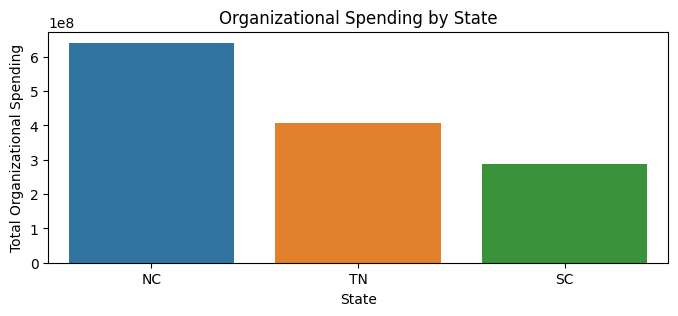

,rndrng_prvdr_state_abrvtn,tot_mdcr_pymt_amt
0,NC,641174881.69
1,TN,408660971.70
2,SC,289073137.76


In [ ]:
#Res04 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res04,
              x='rndrng_prvdr_state_abrvtn',
              y='tot_mdcr_pymt_amt',)
plt.title('Organizational Spending by State')
plt.xlabel('State')
plt.ylabel('Total Organizational Spending')
plt.show()
Res04

## RES05: TITLE “TOP 5 ORG SPENDING BY STATE AND SPECIALTY”


---



In [ ]:
#org_summary.columns

In [ ]:
#Incorrect Attempts at Grouping
#org_state_group = org_summary.groupby('rndrng_prvdr_state_abrvtn')
#org_state_group

#org_spec_group = org_summary.groupby('rndrng_prvdr_type')
#org_spec_group

#org_state_specialty= org_state_group, org_spec_group
#org_state_specialty

In [ ]:
#Close Attempt
#Res05 = org_summary.groupby('rndrng_prvdr_state_abrvtn')[['tot_mdcr_pymt_amt']].sum().nlargest(5,'tot_mdcr_pymt_amt').reset_index()
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Res05

In [ ]:
#Table
Res05_table= (org_summary.groupby(['rndrng_prvdr_state_abrvtn','rndrng_prvdr_type'])[['tot_mdcr_pymt_amt']]
              .sum().sort_values(by='rndrng_prvdr_state_abrvtn',ascending=False)
)
Res05_table

tot_mdcr_pymt_amt
rndrng_prvdr_state_abrvtn rndrng_prvdr_type                                                
TN                        Radiation Therapy Center                                143396.02
                          Clinical Laboratory                                  128751819.81
                          All Other Suppliers                                    5946180.46
                          Ambulance Service Provider                           128737375.49
                          Ambulatory Surgical Center                           108401378.09
                          Clinic or Group Practice                                 61644.73
                          Centralized Flu                                        7241423.04
                          Independent Diagnostic Testing Facility (IDTF)         5620560.69
                          Mass Immunizer Roster Biller                          10849333.97
                          Opioid Treatment Program                               3482017.30
                          Pharmacy                                               4017272.39
                          Portable X-Ray Supplier                                5408569.71
SC                        Independent Diagnostic Testing Facility (IDTF)         9208319.55
                          Public Health or Welfare Agency                           4485.23
                          Pharmacy                                                111148.54
                          Opioid Treatment Program                               1862030.38
                          Mass Immunizer Roster Biller                          10384709.16
                          Intensive Cardiac Rehabilitation                        334236.22
                          Clinical Laboratory                                   71811426.38
                          Centralized Flu                                        7420268.05
                          Ambulatory Surgical Center                            78569205.43
                          Ambulance Service Provider                           109359849.01
                          Clinic or Group Practice                                  7459.81
NC                        Ambulance Service Provider                           144528807.75
                          Mammography Center                                       41454.95
                          Ambulatory Surgical Center                            78164524.07
                          Centralized Flu                                        6572196.17
                          Clinic or Group Practice                                 18268.21
                          Clinical Laboratory                                  357244114.15
                          Independent Diagnostic Testing Facility (IDTF)        13272296.19
                          Opioid Treatment Program                               5641927.13
                          Mass Immunizer Roster Biller                          16004206.92
                          Pharmacy                                              13438189.16
                          Portable X-Ray Supplier                                3372732.33
                          Radiation Therapy Center                                493231.13
                          Sleep Medicine                                             208.78
                          All Other Suppliers                                    2382724.75

In [ ]:
Res05 = (org_summary
         .groupby(["rndrng_prvdr_state_abrvtn","rndrng_prvdr_type"])
         .agg({"tot_mdcr_pymt_amt":["sum", "count"]})
         .reset_index()
         )

In [ ]:
#Res05

In [ ]:
Res05.columns = ["rndrng_prvdr_state_abrvtn","rndrng_prvdr_type","sum",'count']

In [ ]:
#Res05

In [ ]:
Res05=(Res05
 .sort_values(by=['rndrng_prvdr_state_abrvtn', 'sum'],ascending=False)
 .groupby(["rndrng_prvdr_state_abrvtn"])
 .head(5)
)

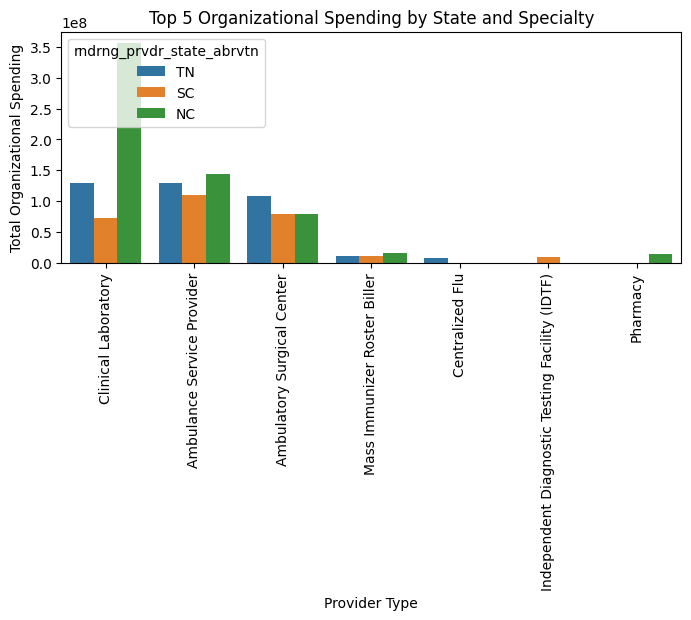

tot_mdcr_pymt_amt
rndrng_prvdr_state_abrvtn rndrng_prvdr_type                                                
TN                        Radiation Therapy Center                                143396.02
                          Clinical Laboratory                                  128751819.81
                          All Other Suppliers                                    5946180.46
                          Ambulance Service Provider                           128737375.49
                          Ambulatory Surgical Center                           108401378.09
                          Clinic or Group Practice                                 61644.73
                          Centralized Flu                                        7241423.04
                          Independent Diagnostic Testing Facility (IDTF)         5620560.69
                          Mass Immunizer Roster Biller                          10849333.97
                          Opioid Treatment Program                               3482017.30
                          Pharmacy                                               4017272.39
                          Portable X-Ray Supplier                                5408569.71
SC                        Independent Diagnostic Testing Facility (IDTF)         9208319.55
                          Public Health or Welfare Agency                           4485.23
                          Pharmacy                                                111148.54
                          Opioid Treatment Program                               1862030.38
                          Mass Immunizer Roster Biller                          10384709.16
                          Intensive Cardiac Rehabilitation                        334236.22
                          Clinical Laboratory                                   71811426.38
                          Centralized Flu                                        7420268.05
                          Ambulatory Surgical Center                            78569205.43
                          Ambulance Service Provider                           109359849.01
                          Clinic or Group Practice                                  7459.81
NC                        Ambulance Service Provider                           144528807.75
                          Mammography Center                                       41454.95
                          Ambulatory Surgical Center                            78164524.07
                          Centralized Flu                                        6572196.17
                          Clinic or Group Practice                                 18268.21
                          Clinical Laboratory                                  357244114.15
                          Independent Diagnostic Testing Facility (IDTF)        13272296.19
                          Opioid Treatment Program                               5641927.13
                          Mass Immunizer Roster Biller                          16004206.92
                          Pharmacy                                              13438189.16
                          Portable X-Ray Supplier                                3372732.33
                          Radiation Therapy Center                                493231.13
                          Sleep Medicine                                             208.78
                          All Other Suppliers                                    2382724.75

In [ ]:
#Res05 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res05,
              x='rndrng_prvdr_type',
              y='sum',
              hue='rndrng_prvdr_state_abrvtn',
              )
plt.title('Top 5 Organizational Spending by State and Specialty')
plt.xlabel('Provider Type')
plt.ylabel('Total Organizational Spending')
plt.xticks(rotation=90)
plt.show()
Res05_table

## RES06: TITLE “TOP 5 PROVIDERs by SPENDING SPECIALTY”

---



In [ ]:
#phys_summary.columns

In [ ]:
#Bad Attempt
#Res06=(phys_summary
 #        .groupby(["rndrng_prvdr_type"])
  #       .agg({"tot_mdcr_pymt_amt":["sum"]})
   #      .reset_index()
    #     .sort_values(by=['tot_mdcr_pymt_amt'],ascending=False)
     #    )
#Res06
#phys_summary['rndrng_prvdr_type'].sum()

In [ ]:
#Bad Attempt
#Res06=(Res06
# .sort_values(by=['sum'],ascending=False)
# .groupby(["rndrng_prvdr_type"])
# .head(5)
#)
#Res06

In [ ]:
Res06 = org_summary.groupby('rndrng_prvdr_type')[['tot_mdcr_pymt_amt']].sum().nlargest(5,'tot_mdcr_pymt_amt').reset_index()
Res06

,rndrng_prvdr_type,tot_mdcr_pymt_amt
0,Clinical Laboratory,557807360.34
1,Ambulance Service Provider,382626032.25
2,Ambulatory Surgical Center,265135107.59
3,Mass Immunizer Roster Biller,37238250.05
4,Independent Diagnostic Testing Facility (IDTF),28101176.43


In [ ]:
Res06.columns = ['rndrng_prvdr_type','sum']

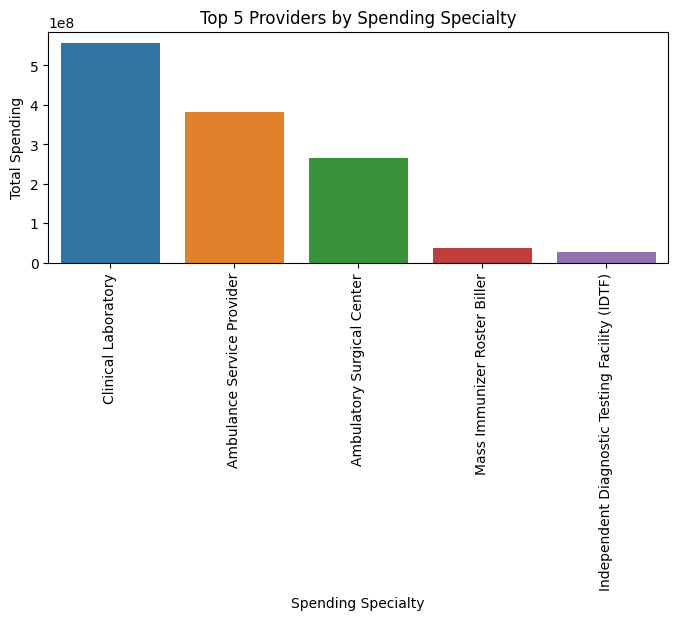

,rndrng_prvdr_type,sum
0,Clinical Laboratory,557807360.34
1,Ambulance Service Provider,382626032.25
2,Ambulatory Surgical Center,265135107.59
3,Mass Immunizer Roster Biller,37238250.05
4,Independent Diagnostic Testing Facility (IDTF),28101176.43


In [ ]:
#Res06 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res06,
              x='rndrng_prvdr_type',
              y='sum',
              )
plt.title('Top 5 Providers by Spending Specialty')
plt.xlabel('Spending Specialty')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)
plt.show()
Res06

## RES07: TITLE “TOP 10 GENERIC OPIATES BY TOTAL DAY SUPPLY”

---




---




In [ ]:
#concat_pres.columns

In [ ]:
#Filter for Opiates
Res07_Filter= concat_pres[concat_pres['is_opiate']=='Yes']
Res07_Filter

,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate
73,73.00,1003006503,Hydromorphone Hcl,Hydromorphone Hcl,18,18.00,262,135.85,NaN,Yes
77,77.00,1003006503,Oxycodone Hcl,Oxycodone Hcl,42,42.00,594,606.17,19.00,Yes
79,79.00,1003007964,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,13,13.00,31,66.42,13.00,Yes
165,165.00,1003010307,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,16,16.00,342,290.33,12.00,Yes
221,221.00,1003010307,Tramadol Hcl,Tramadol Hcl,32,32.00,666,237.99,15.00,Yes
...,...,...,...,...,...,...,...,...,...,...
197508,197930.00,1992987713,Oxycodone-Acetaminophen,Oxycodone Hcl/Acetaminophen,22,22.00,80,161.44,22.00,Yes
197520,197942.00,1992990709,Oxycodone Hcl,Oxycodone Hcl,47,47.00,383,467.53,36.00,Yes
197547,197969.00,1992993760,Morphine Sulfate Er,Morphine Sulfate,20,20.00,600,776.01,NaN,Yes
197552,197974.00,1992993760,Oxycodone Hcl,Oxycodone Hcl,60,60.00,1717,1555.33,26.00,Yes


In [ ]:
Res07 = Res07_Filter.groupby('gnrc_name')[['tot_day_suply']].sum().nlargest(10,'tot_day_suply').reset_index()
Res07

,gnrc_name,tot_day_suply
0,Hydrocodone/Acetaminophen,43131678
1,Oxycodone Hcl/Acetaminophen,25397036
2,Tramadol Hcl,24085196
3,Oxycodone Hcl,19525172
4,Morphine Sulfate,7015124
5,Fentanyl,2607143
6,Methadone Hcl,1330175
7,Acetaminophen With Codeine,1208236
8,Hydromorphone Hcl,1091654
9,Buprenorphine Hcl,1078222


In [ ]:
Res07.columns = ['gnrc_name','sum']
Res07

,gnrc_name,sum
0,Hydrocodone/Acetaminophen,43131678
1,Oxycodone Hcl/Acetaminophen,25397036
2,Tramadol Hcl,24085196
3,Oxycodone Hcl,19525172
4,Morphine Sulfate,7015124
5,Fentanyl,2607143
6,Methadone Hcl,1330175
7,Acetaminophen With Codeine,1208236
8,Hydromorphone Hcl,1091654
9,Buprenorphine Hcl,1078222


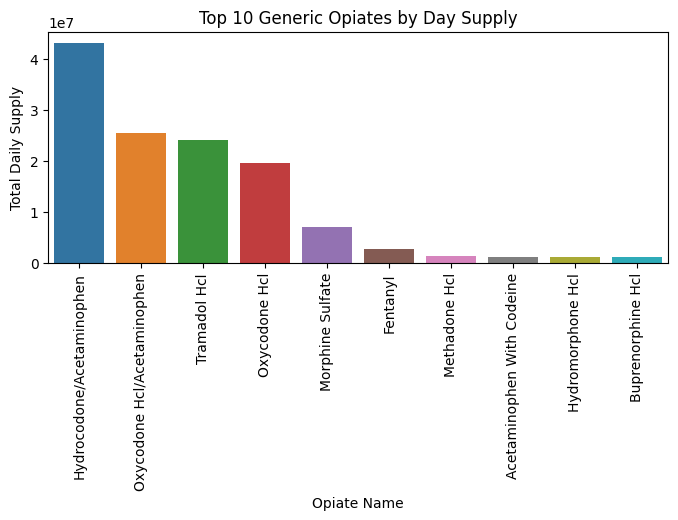

,gnrc_name,sum
0,Hydrocodone/Acetaminophen,43131678
1,Oxycodone Hcl/Acetaminophen,25397036
2,Tramadol Hcl,24085196
3,Oxycodone Hcl,19525172
4,Morphine Sulfate,7015124
5,Fentanyl,2607143
6,Methadone Hcl,1330175
7,Acetaminophen With Codeine,1208236
8,Hydromorphone Hcl,1091654
9,Buprenorphine Hcl,1078222


In [ ]:
#Res07 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res07,
              x='gnrc_name',
              y='sum',
              )
plt.title('Top 10 Generic Opiates by Day Supply')
plt.xlabel('Opiate Name')
plt.ylabel('Total Daily Supply')
plt.xticks(rotation=90)
plt.show()
Res07

## RES08: TITLE “TOP 10 MOST EXPENSIVE DRUGS”


---



In [ ]:
#concat_pres.columns

In [ ]:
#Claim Cost Column
concat_pres['claim_cost'] = concat_pres['tot_drug_cst'] / concat_pres['tot_clms']
concat_pres

,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate,claim_cost
0,0.00,1003000720,Albuterol Sulfate Hfa,Albuterol Sulfate,14,14.00,337,657.01,14.00,No,46.93
1,1.00,1003000720,Amoxicillin-Clavulanate Potass,Amoxicillin/Potassium Clav,34,34.00,328,412.06,34.00,No,12.12
2,2.00,1003000720,Azithromycin,Azithromycin,12,12.00,52,87.21,12.00,No,7.27
3,3.00,1003000720,Cephalexin,Cephalexin,25,25.00,211,144.27,25.00,No,5.77
4,4.00,1003000720,Clindamycin Hcl,Clindamycin Hcl,11,11.00,87,111.93,11.00,No,10.18
...,...,...,...,...,...,...,...,...,...,...,...
197559,197981.00,1992993760,Trazodone Hcl,Trazodone Hcl,15,19.00,570,90.73,NaN,No,6.05
197560,197982.00,1992993760,Valacyclovir,Valacyclovir Hcl,24,34.00,1020,1811.73,NaN,No,75.49
197561,197983.00,1992993760,Xarelto,Rivaroxaban,19,19.00,570,8936.06,NaN,No,470.32
197562,197984.00,1992996292,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,36,36.00,83,127.46,35.00,Yes,3.54


In [ ]:
Res08 = concat_pres.groupby('brnd_name')[['claim_cost']].mean().nlargest(10,'claim_cost').reset_index()
Res08

,brnd_name,claim_cost
0,Myalept,165046.88
1,Strensiq,112137.00
2,Berinert,107622.89
3,Ravicti,95992.31
4,Firazyr,75005.84
5,Lumizyme,73466.83
6,Chenodal,65809.59
7,Aldurazyme,63541.30
8,Ayvakit,61090.00
9,Procysbi,57488.64


In [ ]:
Res08.columns= ['brand_name',"mean"]
Res08

,brand_name,mean
0,Myalept,165046.88
1,Strensiq,112137.00
2,Berinert,107622.89
3,Ravicti,95992.31
4,Firazyr,75005.84
5,Lumizyme,73466.83
6,Chenodal,65809.59
7,Aldurazyme,63541.30
8,Ayvakit,61090.00
9,Procysbi,57488.64


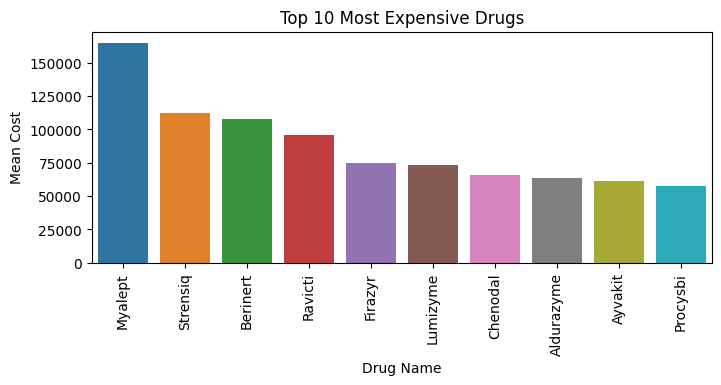

,brand_name,mean
0,Myalept,165046.88
1,Strensiq,112137.00
2,Berinert,107622.89
3,Ravicti,95992.31
4,Firazyr,75005.84
5,Lumizyme,73466.83
6,Chenodal,65809.59
7,Aldurazyme,63541.30
8,Ayvakit,61090.00
9,Procysbi,57488.64


In [ ]:
#Res08 Final
plt.figure(figsize=(8, 3))
sns.barplot(data=Res08,
              x='brand_name',
              y='mean',
              )
plt.title('Top 10 Most Expensive Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Mean Cost')
plt.xticks(rotation=90)
plt.show()
Res08

## RES09: TITLE “TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE”


---



In [ ]:
#phys_summary

In [ ]:
#Filter for Top 2 Opiates
Res09_Filter1 = (concat_pres[(concat_pres['gnrc_name'] == 'Hydrocodone/Acetaminophen')
                | (concat_pres['gnrc_name']=='Oxycodone Hcl/Acetaminophen')]
                )
Res09_Filter1

,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate,claim_cost
79,79.00,1003007964,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,13,13.00,31,66.42,13.00,Yes,5.11
165,165.00,1003010307,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,16,16.00,342,290.33,12.00,Yes,18.15
415,415.00,1003013160,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,172,172.00,4716,4982.87,24.00,Yes,28.97
448,448.00,1003013160,Oxycodone-Acetaminophen,Oxycodone Hcl/Acetaminophen,55,55.00,1520,2561.33,NaN,Yes,46.57
496,496.00,1003013616,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,30,30.00,877,533.25,NaN,Yes,17.77
...,...,...,...,...,...,...,...,...,...,...,...
197381,197803.00,1992979736,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,12,12.00,122,218.20,NaN,Yes,18.18
197448,197870.00,1992985949,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,12,12.00,150,116.68,NaN,Yes,9.72
197506,197928.00,1992987713,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,73,73.00,230,411.49,66.00,Yes,5.64
197508,197930.00,1992987713,Oxycodone-Acetaminophen,Oxycodone Hcl/Acetaminophen,22,22.00,80,161.44,22.00,Yes,7.34


I got lost here and it ruined my data for the other steps, the filtered data would not join at axis 1 so it is missing for the future steps

In [ ]:
#Join Opiates to Phys_Summary
Res09_Pres_Join = pd.concat([phys_summary,Res09_Filter1],axis=0)
Res09_Pres_Join

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,is_opiate,claim_cost
0,1003000720.00,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1013204148.00,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1013949759.00,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1013998848.00,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1063481497.00,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197803.00,1992979736.00,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,12.00,12.00,122.00,218.20,Yes,18.18
197448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197870.00,1992985949.00,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,12.00,12.00,150.00,116.68,Yes,9.72
197506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197928.00,1992987713.00,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,73.00,73.00,230.00,411.49,Yes,5.64
197508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197930.00,1992987713.00,Oxycodone-Acetaminophen,Oxycodone Hcl/Acetaminophen,22.00,22.00,80.00,161.44,Yes,7.34


In [ ]:
#Filter For SC, NC, TN
Res09_Filter2 = (Res09_Pres_Join[(Res09_Pres_Join['official_usps_state_code']=='SC')
                | (Res09_Pres_Join['official_usps_state_code']== 'NC')
                | (Res09_Pres_Join['official_usps_state_code']=="TN")]
                )
Res09_Filter2

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,is_opiate,claim_cost
0,1003000720.00,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1013204148.00,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1013949759.00,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1013998848.00,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1063481497.00,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,1982041182.00,Moreland,Natalie,J,"M.S., CCC-SLP",F,I,55 Nursing Home Rd,NaN,Chuckey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72654,1992072524.00,Graham,Patton,D,NP-C,M,I,6419 Arno College Grove Rd,NaN,College Grove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72655,1992785653.00,Nieto,Charles,M,M.D.,M,I,4789 State Rd,NaN,Ridgeville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72656,1992804587.00,Warren,Joseph,R,PA,M,I,109 S Sycamore St,NaN,Fremont,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Create Another Column for State_city
Res09_Filter2["state_city"] = Res09_Filter2["official_usps_state_code"] + " - " + Res09_Filter2["official_usps_city_name"]
Res09_Filter2

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,is_opiate,claim_cost,state_city
0,1003000720.00,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Clemmons
1,1013204148.00,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Clemmons
2,1013949759.00,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Clemmons
3,1013998848.00,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Clemmons
4,1063481497.00,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Clemmons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,1982041182.00,Moreland,Natalie,J,"M.S., CCC-SLP",F,I,55 Nursing Home Rd,NaN,Chuckey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN - Chuckey
72654,1992072524.00,Graham,Patton,D,NP-C,M,I,6419 Arno College Grove Rd,NaN,College Grove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN - College Grove
72655,1992785653.00,Nieto,Charles,M,M.D.,M,I,4789 State Rd,NaN,Ridgeville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC - Ridgeville
72656,1992804587.00,Warren,Joseph,R,PA,M,I,109 S Sycamore St,NaN,Fremont,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC - Fremont


In [ ]:
#Group By City Name and State Code
Res09_City = Res09_Filter2.groupby(['state_city'])[['tot_day_suply','tot_drug_cst']]
Res09_City

Res08 = concat_pres.groupby('brnd_name')[['claim_cost']].mean().nlargest(10,'claim_cost').reset_index()
Res08

,brnd_name,claim_cost
0,Myalept,165046.88
1,Strensiq,112137.00
2,Berinert,107622.89
3,Ravicti,95992.31
4,Firazyr,75005.84
5,Lumizyme,73466.83
6,Chenodal,65809.59
7,Aldurazyme,63541.30
8,Ayvakit,61090.00
9,Procysbi,57488.64


In [ ]:
#Sum and Mean of Day supply and Drug Cst
Res09_SM = Res09_City.sum('tot_day_suply').reset_index()
Res09_SM
#Res01 = phys_summary.groupby('provider_name')[['tot_mdcr_pymt_amt']].sum().nlargest(10,'tot_mdcr_pymt_amt').reset_index()
#Res01

,state_city,tot_day_suply,tot_drug_cst
0,NC - Aberdeen,0.00,0.00
1,NC - Advance,0.00,0.00
2,NC - Ahoskie,0.00,0.00
3,NC - Albemarle,0.00,0.00
4,NC - Andrews,0.00,0.00
...,...,...,...
880,TN - Whitwell,0.00,0.00
881,TN - Winchester,0.00,0.00
882,TN - Winfield,0.00,0.00
883,TN - Woodbury,0.00,0.00


## RES10: TITLE "AN OPIATE A DAY"


---



In [ ]:
#Conects with Question 9

# TASK 4 YOUR ANALYSIS

#Res 11: Top 5 Total Payment Amounts by Average Age

In [ ]:
#phys_summary.columns

In [ ]:
#org_summary.columns

In [ ]:
Res11= phys_summary.groupby('bene_avg_age')[['tot_mdcr_pymt_amt']].sum().nlargest(5,'tot_mdcr_pymt_amt').reset_index()
Res11

,bene_avg_age,tot_mdcr_pymt_amt
0,73,1110759760.39
1,74,984493127.95
2,72,867744744.55
3,75,642530748.95
4,71,535940321.96


In [ ]:
Res11.columns = ['bene_avg_age','total_payment']

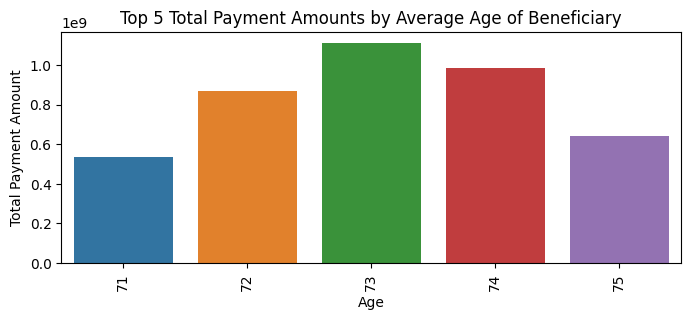

,bene_avg_age,total_payment
0,73,1110759760.39
1,74,984493127.95
2,72,867744744.55
3,75,642530748.95
4,71,535940321.96


In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=Res11,
              x='bene_avg_age',
              y='total_payment',
              )
plt.title('Top 5 Total Payment Amounts by Average Age of Beneficiary')
plt.xlabel('Age')
plt.ylabel('Total Payment Amount')
plt.xticks(rotation=90)
plt.show()
Res11

#Res 12: Top 5 Total Drug Service Beneficiaries by Zip Code

In [ ]:
Res12= phys_summary.groupby('zip_code')[['drug_tot_benes']].sum().nlargest(5,'drug_tot_benes').reset_index()
Res12

,zip_code,drug_tot_benes
0,38138,32933.00
1,27834,27379.00
2,37203,26227.00
3,28562,20915.00
4,38305,18943.00


In [ ]:
Res12.columns = ['zip_code','drug_tot_benes']

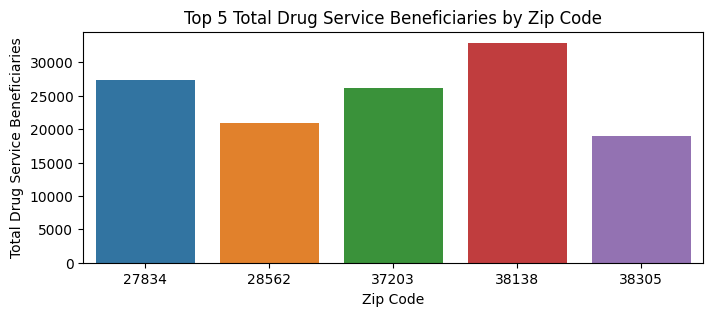

,zip_code,drug_tot_benes
0,38138,32933.00
1,27834,27379.00
2,37203,26227.00
3,28562,20915.00
4,38305,18943.00


In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=Res12,
              x='zip_code',
              y='drug_tot_benes',
              )
plt.title('Top 5 Total Drug Service Beneficiaries by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Total Drug Service Beneficiaries')
plt.show()
Res12

#Res 13: Top 5 Total Medicare Costs for Beneficiary Risk Score

In [ ]:
Res13= phys_summary.groupby('bene_avg_risk_scre')[['tot_mdcr_pymt_amt']].sum().nlargest(5,'tot_mdcr_pymt_amt').reset_index()
Res13

,bene_avg_risk_scre,tot_mdcr_pymt_amt
0,2.24,14240431.10
1,1.32,13651932.47
2,1.62,11019181.24
3,1.82,10243719.73
4,2.37,8669421.41


In [ ]:
Res13.columns= ['bene_avg_risk_scre','total_payment']

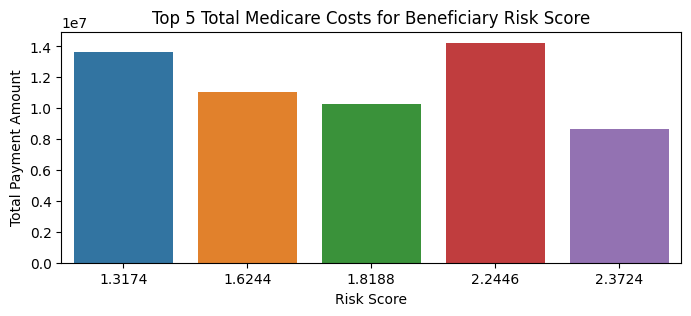

,bene_avg_risk_scre,total_payment
0,2.24,14240431.10
1,1.32,13651932.47
2,1.62,11019181.24
3,1.82,10243719.73
4,2.37,8669421.41


In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=Res13,
              x='bene_avg_risk_scre',
              y='total_payment',
              )
plt.title('Top 5 Total Medicare Costs for Beneficiary Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Total Payment Amount')
plt.show()
Res13

#Res 14: Top 5 Total Medicare Costs by Population Density

In [ ]:
#pop density
Res14= phys_summary.groupby('density')[['tot_mdcr_pymt_amt']].sum().nlargest(5,'tot_mdcr_pymt_amt').reset_index()
Res14

,density,tot_mdcr_pymt_amt
0,1389.20,154399600.90
1,821.20,135002855.77
2,394.30,126330195.41
3,125.10,110255972.34
4,783.70,101727606.73


In [ ]:
Res14.columns = ['density','total_payment']

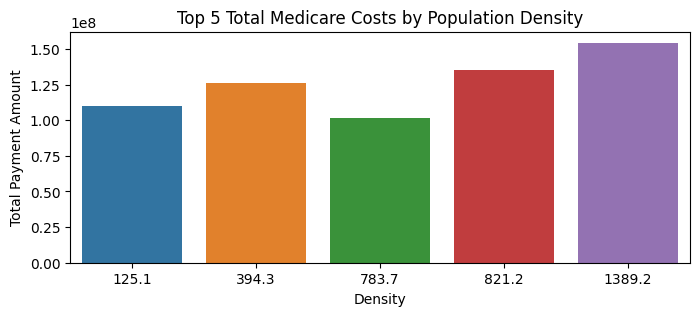

,density,total_payment
0,1389.20,154399600.90
1,821.20,135002855.77
2,394.30,126330195.41
3,125.10,110255972.34
4,783.70,101727606.73


In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=Res14,
              x='density',
              y='total_payment',
              )
plt.title('Top 5 Total Medicare Costs by Population Density')
plt.xlabel('Density')
plt.ylabel('Total Payment Amount')
plt.show()
Res14

#Res 15: Top 5 Total Medicare Costs by Percentage of Beneficiaries with Asthma

In [ ]:
Res15= phys_summary.groupby('bene_cc_asthma_pct')[['tot_mdcr_pymt_amt']].sum('tot_mdcr_pymt_amt').nlargest(5,'tot_mdcr_pymt_amt').reset_index()
Res15

,bene_cc_asthma_pct,tot_mdcr_pymt_amt
0,0.06,899532505.77
1,0.05,754984741.53
2,0.07,725123888.15
3,0.08,641164035.67
4,0.09,508382840.83


In [ ]:
Res15.columns=['average_asthma_pct','total_payment']

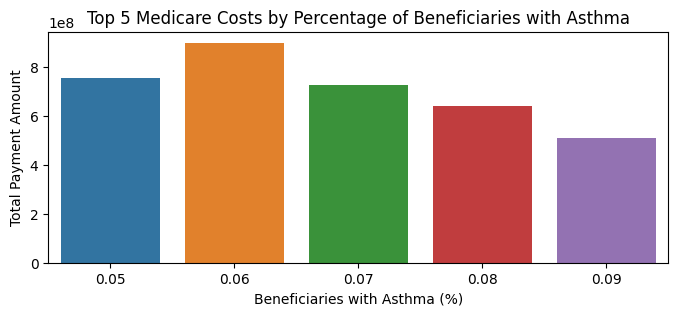

,average_asthma_pct,total_payment
0,0.06,899532505.77
1,0.05,754984741.53
2,0.07,725123888.15
3,0.08,641164035.67
4,0.09,508382840.83


In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=Res15,
              x='average_asthma_pct',
              y='total_payment',
              )
plt.title('Top 5 Medicare Costs by Percentage of Beneficiaries with Asthma')
plt.xlabel('Beneficiaries with Asthma (%)')
plt.ylabel('Total Payment Amount')
plt.show()
Res15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Projects/Project 4 Midterm/BAN6005_Mid_Term_Nik_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Projects/Project 4 Midterm/BAN6005_Mid_Term_Nik_Baldis.ipynb to html
[NbConvertApp] Writing 1666979 bytes to /content/drive/MyDrive/Colab Notebooks/Projects/Project 4 Midterm/BAN6005_Mid_Term_Nik_Baldis.html
